In [12]:
from logicqubit.logic import *
import random
import matplotlib.pyplot as plt

In [13]:
# |<C>| = |<z.z> + <x.z> + <z.x> - <x.x>| <= 2
def bell_inequality(A, B):
    zz = 0
    xz = 0
    zx = 0
    xx = 0
    cnt_zz = 0
    cnt_xz = 0
    cnt_zx = 0
    cnt_xx = 0
    
    for a,b in zip(A,B):
        if a[0]=='Z' and b[0]=='Z':
            zz += a[1]*b[1]
            cnt_zz += 1
        if a[0]=='X' and b[0]=='Z':
            xz += a[1]*b[1]
            cnt_xz += 1
        if a[0]=='Z' and b[0]=='X':
            zz += a[1]*b[1]
            cnt_zx += 1
        if a[0]=='X' and b[0]=='X':
            zz += a[1]*b[1]
            cnt_xx += 1
            
    zz = zz / cnt_zz
    xz = xz / cnt_xz
    zx = zx / cnt_zx
    xx = xx / cnt_xx
    total = zz + xz + zx - xx
    inequality = sqrt(total * total)
    #print(cnt_zz,cnt_xz,cnt_zx,cnt_xx)
    return inequality

def measurements(eva=False, attempts=10, angle = 90):
    to_minus_one = lambda x: -1 if x == 0 else x
    measure_A = []
    measure_B = []

    angle = angle*pi/180     
    for i in range(attempts):
        logicQuBit = LogicQuBit(2)

        A = Qubit()
        B = Qubit()

        # generate entangled state
        A.H()
        B.CNOT(A)

        # Alice choose the measurement
        measure_type_A = random.choice(['Z', 'X'])
        if 'X' in measure_type_A:
            A.RY(-angle)
            #A.H()

        # Alice performs the measurement
        m_A = logicQuBit.Measure_One(A)[0]
        m_A = to_minus_one(m_A)

        # Eva performs the measurement
        if eva:
            measure_type_E = random.choice(['Z', 'X'])
            if 'X' in measure_type_E:
                B.RY(-angle)
                #B.H()
            m_E = logicQuBit.Measure_One(B)[0]

        # Bob choose the measurement
        measure_type_B = random.choice(['Z', 'X'])
        if 'X' in measure_type_B:
            B.RY(-angle)
            #B.H()

        # Bob performs the measurement
        m_B = logicQuBit.Measure_One(B)[0]
        m_B = to_minus_one(m_B)

        measure_A.append([measure_type_A, m_A])
        measure_B.append([measure_type_B, m_B])

    return measure_A, measure_B

def separete_data(A, B):
    equals = [A[i] for i in range(len(A)) if A[i] == B[i]]
    error = [A[i] for i in range(len(A)) if A[i][0] == B[i][0] and A[i][1] != B[i][1]]
    a = [A[i] for i in range(len(A)) if A[i] != B[i]]
    b = [B[i] for i in range(len(B)) if A[i] != B[i]]
    return equals, error, a, b

measure_A, measure_B = measurements(eva=False, attempts=200, angle=70)
key, error, a, b = separete_data(measure_A, measure_B)
bell = bell_inequality(measure_A, measure_B)
size_key_x = len([i for i in key if i[0]=='X'])
size_key_z = len([i for i in key if i[0]=='Z'])
key_diff = [i for i in key if i]

print(size_key_z, size_key_x)
print(bell.real, len(key), len(error))

46 46
3.1890894175553735 92 0


In [14]:
print(measure_A[:10])
print(measure_B[:10])

[['X', -1], ['Z', -1], ['Z', 1], ['Z', 1], ['X', 1], ['X', 1], ['Z', 1], ['X', -1], ['X', 1], ['X', -1]]
[['Z', -1], ['X', -1], ['Z', 1], ['Z', 1], ['Z', 1], ['Z', 1], ['Z', 1], ['X', -1], ['Z', 1], ['X', -1]]


value: 2.17371231353251


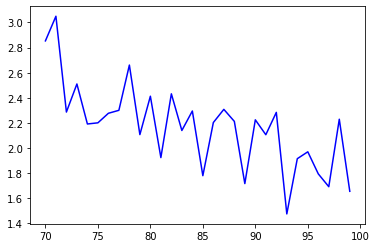

In [15]:
# without eva
step = 1 
angles = np.arange(70, 100, step)
result_without_eva = []
for angle in angles:
    measure_A, measure_B = measurements(eva=False, attempts=200, angle=angle)
    bell = bell_inequality(measure_A, measure_B)
    result_without_eva.append(bell)
mean_without_eva = np.mean(result_without_eva)
print("value: "+str(mean_without_eva.real))
plt.plot(angles, result_without_eva, color='blue')
plt.show()

value: 1.2472595296684632


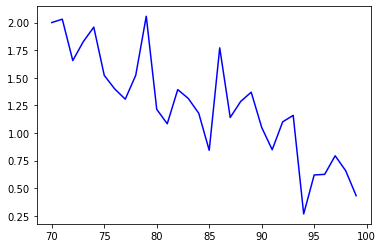

In [16]:
# with eva
step = 1 
angles = np.arange(70, 100, step)
result_with_eva = []
for angle in angles:
    measure_A, measure_B = measurements(eva=True, attempts=200, angle=angle)
    bell = bell_inequality(measure_A, measure_B)
    result_with_eva.append(bell)
mean_with_eva = np.mean(result_with_eva)
print("value: "+str(mean_with_eva.real))
plt.plot(angles, result_with_eva, color='blue')
plt.show()